#  Housing Price Prediction Model: Project Documentation
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

##  Project Overview
This project aims to develop a **robust machine learning model** to predict housing prices — such as `median_sale_price` or `price_per_sqft` — across major U.S. cities and states.  

We are working with a **comprehensive dataset** spanning over **80 CSV files** from all 50 U.S. states. The dataset includes **historical real estate market data** with features like median sale prices, inventory, days on market, and market conditions.  

The goal is to:
- Support predictions for **specific states or cities**
- Address **temporal trends**, **geographical variations**, and **categorical features**
- Ensure **scalability** and **accuracy** for real-world deployment

---

##  Dataset Description
The dataset consists of over **80 CSV files**, each representing real estate data for major cities in **50 U.S. states** (`AL, AK, AZ, ..., WY`).  

### Key Columns
**1. Temporal**
- `period_begin`, `period_end`, `last_updated`

**2. Geographical**
- `region`, `city`, `state`, `metro`, `region_type` *(urban, suburban, rural)*

**3. Price Metrics**
- `median_sale_price`, `median_list_price`, `price_per_sqft`

**4. Market Activity**
- `homes_sold`, `new_listings`, `inventory`, `pending_sales`, `median_dom`, `avg_days_to_close`

**5. Market Dynamics**
- `sold_above_list`, `sold_below_list`, `avg_sale_to_list_ratio`, `price_dropped_pct`,  
  `off_market_in_2_weeks`, `months_of_supply`, `market_type` *(seller’s, buyer’s, balanced)*

**6. Metadata**
- `property_type` *(single-family, condo, etc.)*
- `is_seasonally_adjusted`

** Challenge:** The dataset’s **scale and diversity** require careful preprocessing to handle:
- Missing values  
- Outliers  
- Spatio-temporal patterns

---

## 🛠 Step 1: Data Ingestion and Integration
**Objective:** Consolidate all CSV files into a unified dataset for analysis and modeling.

**Tasks:**
1. Load all CSV files (e.g., `AL_data.csv`, `CA_data.csv`) into a single Pandas DataFrame.
2. Use a loop or **Dask** for efficiency with large datasets.
3. Standardize column names and data types.
4. Add a `state` column if not present (from file names or metadata).
5. Check for duplicates — especially for metro areas spanning multiple states (e.g., Kansas City in MO/KS).
6. Validate data completeness, dropping rows with **>50% missing values** for critical columns like `median_sale_price`.

**Deliverable:**  
 **Master DataFrame** with millions of rows, covering all states/cities and standardized features.

---

##  Step 2: Exploratory Data Analysis (EDA)
**Objective:** Understand data distributions, patterns, and issues.

**Tasks:**
- Compute **descriptive statistics** for numerical features by `state`, `city`, and `property_type`.
- Visualize **time-series trends** (e.g., `median_sale_price` over `period_begin`).
- Create **correlation heatmaps** and **boxplots** for outliers.
- Analyze **missing data patterns** with heatmaps.
- Explore **categorical distributions** (`property_type`, `market_type`).
- Investigate **seasonality** (`is_seasonally_adjusted`) and **geospatial trends**.

**Deliverable:**  
 Insights on key drivers, anomalies (e.g., COVID-era price spikes), and data quality issues.

---

##  Step 3: Data Preprocessing & Feature Engineering
**Objective:** Clean and transform data to enhance model performance.

**Tasks:**
- **Cleaning:**  
  - Remove outliers (e.g., `median_dom > 365 days`)  
  - Log-transform skewed features
- **Feature Engineering:**  
  - Extract `year`, `month`, `quarter` from `period_begin/end`  
  - Create lag features (e.g., previous month’s `median_list_price`)  
  - Aggregate state/metro-level metrics
  - Derive “market heat” index: `price_dropped_pct / off_market_in_2_weeks`
- **Encoding:**  
  - One-hot encode categorical features  
  - Target encode high-cardinality features (`city`, `state`)
- **Scaling:** Standardize numerical features  
- **Splitting:** Time-based train-test split (80% / 20%)

**Deliverable:**  
 **Cleaned, feature-rich DataFrame** ready for modeling.

---

##  Step 4: Feature Selection
**Objective:** Reduce dimensionality and avoid overfitting.

**Tasks:**
- Use **correlation analysis**, **mutual information**, or **RFE**.
- Drop highly correlated features (`corr > 0.8`).
- Consider **PCA** if feature count exceeds 50 (while maintaining interpretability).

**Deliverable:**  
 10–20 **high-impact features** for modeling.

---

##  Step 5: Model Selection & Training
**Preferred Model:** Gradient Boosting Regressor (XGBoost or LightGBM)  

**Why?**
- Handles **non-linear relationships**
- Works well with **mixed data types**
- Robust to **missing values**
- Scalable for **large datasets**

**Alternatives Considered:**  
- Linear Regression  Too simplistic  
- Random Forest  Slower than boosting  
- Neural Networks  Overkill for initial models  
- Time-Series Models  Ignore spatial features

**Tasks:**
- Train model with default hyperparameters  
- Use **TimeSeriesSplit** (5 folds) for cross-validation  
- Include `state`/`city` as features for location-specific predictions

**Deliverable:**  
 **Trained baseline model** with initial metrics.

---

##  Step 6: Model Evaluation & Iteration
**Tasks:**
- Evaluate with **RMSE**, **MAE**, **R²**
- Compare against baseline predictor (mean price)
- Analyze **residuals** and interpret results with **SHAP values**
- Tune hyperparameters using **GridSearchCV** or **Optuna**
- Test on **edge cases** (e.g., seller’s vs. buyer’s markets)
- Build a **reproducible pipeline**
- Monitor for **data drift** using `last_updated`

**Deliverable:**  
 Tuned model with **<10% MAPE** on test data.

---

##  Next Steps
1. Implement the above steps in notebook cells.
2. Iterate based on findings (e.g., integrate hybrid models like **XGBoost + Prophet** if strong seasonality is found).
3. Validate predictions for specific states/cities.
4. Prepare for **deployment**.

---

 **Note:**  
This workflow applies **best practices from my data science experience** to deliver accurate and interpretable housing price predictions.


In [1]:
# Cell 2: Import Libraries and Dependencies

# Data manipulation and analysis
import pandas as pd          # For loading, merging, and manipulating CSV files
import numpy as np           # For numerical operations and array handling
import dask.dataframe as dd  # For handling large datasets if memory is a constraint

# Data visualization
import matplotlib.pyplot as plt  # For plotting time-series and other visualizations
import seaborn as sns            # For advanced visualizations like heatmaps and boxplots

# Ensure plots display in Jupyter Notebook
%matplotlib inline

# Data preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding
from sklearn.compose import ColumnTransformer                   # For applying transformations to specific columns
from sklearn.pipeline import Pipeline                           # For creating reproducible preprocessing pipelines
from category_encoders import TargetEncoder                     # For target encoding high-cardinality features

# Feature selection
from sklearn.feature_selection import mutual_info_regression    # For feature importance via mutual information
from sklearn.feature_selection import RFE                       # For recursive feature elimination

# Machine learning model
import xgboost as xgb         # Gradient boosting model for regression
from sklearn.model_selection import TimeSeriesSplit            # For time-series cross-validation
from sklearn.model_selection import GridSearchCV               # For hyperparameter tuning

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For regression metrics
import shap                   # For model interpretability and feature importance analysis

# File handling and system operations
import os                     # For navigating directories and accessing CSV files
import glob                   # For pattern matching to load multiple CSV files

# Miscellaneous
import warnings               # To suppress unnecessary warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# Set random seed for reproducibility
np.random.seed(42)

# Optional: Configure Pandas for better display
pd.set_option('display.max_columns', None)  # Show all columns in DataFrames
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats for readability


In [2]:
import pandas as pd
import os, glob

path = r"C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset"
files = glob.glob(os.path.join(path, "*.csv"))

if not files:
    raise FileNotFoundError(f"No CSV files found in {path}")

dfs = []
for file in files:
    print(f"Processing: {file}")
    df = None
    for enc in ['utf-8-sig', 'utf-8', 'latin-1']:
        try:
            df = pd.read_csv(file, encoding=enc, low_memory=False)
            break
        except Exception as e:
            print(f"  Failed with encoding {enc}: {e}")
    if df is None:
        print(f" Skipping {file} — could not read")
        continue

    if df.empty:
        print(f"⚠ Skipping {file} — empty dataframe")
        continue

    df['source_file'] = os.path.basename(file)
    dfs.append(df)

if not dfs:
    raise ValueError("No valid CSVs loaded — check files and formats")

master_df = pd.concat(dfs, ignore_index=True)
print(f" Merged {len(master_df)} rows from {len(dfs)} files")


Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AK-1.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AK-2.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AL-1.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AL-2.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AR-1.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AR-2.csv
Processing: C:\Users\AKINMADE FARUQ\Downloads/PROJECT MATERIALS/DATA SCIENCE COMPLETE PROJECTS/USA HOUSING PREDICTION MODEL/Dataset\AR-3.csv
Processing: C

In [3]:
print(master_df.columns.tolist())


['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE', 'source_file']


In [4]:
import pandas as pd
import numpy as np

# ===== EDA Section =====

print("\n Dataset Shape:", master_df.shape)

# Preview
print("\n First 5 Rows:")
print(master_df.head())

# Column Info
print("\nℹ Dataset Info:")
print(master_df.info())

# Missing values summary
print("\n Missing Values Summary:")
missing_vals = master_df.isnull().sum()
missing_vals = missing_vals[missing_vals > 0].sort_values(ascending=False)
print(missing_vals)

# Detect numerical vs categorical columns
numeric_cols = master_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = master_df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\n Numerical Columns ({len(numeric_cols)}): {numeric_cols}")
print(f" Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

# Numerical features summary
if numeric_cols:
    print("\n Numerical Features Summary:")
    print(master_df[numeric_cols].describe())

# Categorical features summary
if categorical_cols:
    print("\n Categorical Features Summary (Top 10):")
    for col in categorical_cols:
        print(f"\n{col} — Unique values: {master_df[col].nunique()}")
        print(master_df[col].value_counts().head(10))

# Check duplicates
dup_count = master_df.duplicated().sum()
print(f"\n Duplicate Rows: {dup_count}")



 Dataset Shape: (28130, 28)

 First 5 Rows:
                                           SALE TYPE  SOLD DATE  \
0  In accordance with local MLS rules, some MLS l...        NaN   
1                                        MLS Listing        NaN   
2                                        MLS Listing        NaN   
3                                        MLS Listing        NaN   
4                                        MLS Listing        NaN   

             PROPERTY TYPE                     ADDRESS       CITY  \
0                      NaN                         NaN        NaN   
1              Condo/Co-op           804 W 10th Ave #2  Anchorage   
2  Multi-Family (2-4 Unit)            4406 Parsons Ave  Anchorage   
3  Multi-Family (2-4 Unit)             808 N Flower St  Anchorage   
4              Condo/Co-op  4355 Constellation Ave #23  Anchorage   

  STATE OR PROVINCE ZIP OR POSTAL CODE     PRICE  BEDS  BATHS  \
0               NaN                NaN       NaN   NaN    NaN   
1      

In [16]:
# Cell 5: Data Preprocessing and Feature Engineering

# Ensure master_df is available from Cell 3
if 'master_df' not in locals():
    raise NameError("master_df not found. Please run Cell 3 first.")

# Create a copy of the DataFrame to avoid modifying the original
df = master_df.copy()

# 1. Drop Unnecessary Columns
# Columns with high missingness or no predictive value
drop_cols = [
    'SOLD DATE',  # 100% missing
    'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',  # ~83% missing
    'FAVORITE', 'INTERESTED',  # No variation (all N/Y)
    'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',  # Non-predictive
    'MLS#', 'ADDRESS'  # High cardinality, redundant with CITY/STATE
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])
print(f"\nDropped columns: {[col for col in drop_cols if col in df.columns]}")
print(f"Remaining columns: {df.columns.tolist()}")

# 2. Handle Missing Values
# Define critical columns for prediction
critical_cols = ['PRICE', 'CITY', 'STATE OR PROVINCE', 'PROPERTY TYPE']
initial_rows = len(df)

# Drop rows with missing critical columns
df = df.dropna(subset=critical_cols)
print(f"\nRows dropped due to missing critical columns: {initial_rows - len(df)}")

# Impute numerical columns with median
numerical_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode or 'Unknown'
categorical_cols = ['LOCATION', 'STATUS', 'SOURCE', 'ZIP OR POSTAL CODE']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

print("\nMissing values after imputation:")
print(df.isnull().sum())

# 3. Handle Outliers
# Cap PRICE outliers using IQR method
if 'PRICE' in df.columns:
    Q1 = df['PRICE'].quantile(0.25)
    Q3 = df['PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df['PRICE'] = df['PRICE'].clip(lower=lower_bound, upper=upper_bound)
    print(f"\nPRICE capped at [{lower_bound:.2f}, {upper_bound:.2f}]")

# Log-transform PRICE to reduce skewness
df['log_PRICE'] = np.log1p(df['PRICE'])  # log1p to handle zero/negative values
print("\nAdded log_PRICE to reduce skewness")

# 4. Feature Engineering
# Price per square foot (if not already provided)
if 'SQUARE FEET' in df.columns and '$/SQUARE FEET' not in df.columns:
    df['$/SQUARE FEET'] = df['PRICE'] / df['SQUARE FEET'].replace(0, np.nan)
    df['$/SQUARE FEET'] = df['$/SQUARE FEET'].fillna(df['$/SQUARE FEET'].median())

# House age
if 'YEAR BUILT' in df.columns:
    df['house_age'] = 2025 - df['YEAR BUILT']  # Current year is 2025
    df['house_age'] = df['house_age'].clip(lower=0)  # Handle invalid years (e.g., 2502)

# Bedrooms to bathrooms ratio
if 'BEDS' in df.columns and 'BATHS' in df.columns:
    df['beds_to_baths_ratio'] = df['BEDS'] / df['BATHS'].replace(0, np.nan)
    df['beds_to_baths_ratio'] = df['beds_to_baths_ratio'].fillna(df['beds_to_baths_ratio'].median())

print("\nNew features added: ['log_PRICE', 'house_age', 'beds_to_baths_ratio']")

# 5. Encode Categorical Variables
# One-hot encode low-cardinality categoricals
low_cardinality_cols = ['PROPERTY TYPE', 'STATUS']
if all(col in df.columns for col in low_cardinality_cols):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated for scikit-learn compatibility
    ohe_cols = pd.DataFrame(ohe.fit_transform(df[low_cardinality_cols]), 
                            columns=ohe.get_feature_names_out(low_cardinality_cols), 
                            index=df.index)
    df = pd.concat([df.drop(columns=low_cardinality_cols), ohe_cols], axis=1)
    print(f"\nOne-hot encoded columns: {ohe.get_feature_names_out(low_cardinality_cols).tolist()}")

# Target encode high-cardinality categoricals
high_cardinality_cols = ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']
if 'PRICE' in df.columns:
    target_encoder = TargetEncoder()
    for col in high_cardinality_cols:
        if col in df.columns:
            df[f'{col}_encoded'] = target_encoder.fit_transform(df[col], df['PRICE'])
    df = df.drop(columns=high_cardinality_cols)
    print(f"\nTarget encoded columns: {[f'{col}_encoded' for col in high_cardinality_cols if col in master_df.columns]}")

# Drop SOURCE and source_file (non-predictive metadata)
df = df.drop(columns=['SOURCE', 'source_file', 'SALE TYPE'], errors='ignore')  # Added SALE TYPE (high missingness, low predictive value)
print(f"\nRemaining columns after encoding: {df.columns.tolist()}")

# 6. Scale Numerical Features
numerical_cols = [col for col in numerical_cols if col in df.columns] + ['house_age', 'beds_to_baths_ratio', 'log_PRICE']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nScaled numerical columns:", numerical_cols)

# 7. Time-Based Train-Test Split
# Use DAYS ON MARKET as a proxy for recency since SOLD DATE is missing
if 'DAYS ON MARKET' in df.columns:
    df = df.sort_values(by='DAYS ON MARKET', ascending=True)
    train_size = int(0.8 * len(df))
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    print(f"\nTrain set size: {len(train_df)}, Test set size: {len(test_df)}")
else:
    # Fallback: random split
    train_df = df.sample(frac=0.8, random_state=42)
    test_df = df.drop(train_df.index)
    print(f"\nTrain set size (random split): {len(train_df)}, Test set size: {len(test_df)}")

# Save preprocessed DataFrames
train_df.to_csv("./housing_data/train_preprocessed.csv", index=False)
test_df.to_csv("./housing_data/test_preprocessed.csv", index=False)
print("\nPreprocessed train and test sets saved to './housing_data/train_preprocessed.csv' and './housing_data/test_preprocessed.csv'")

# Display first few rows of preprocessed train data
train_df.head()


Dropped columns: []
Remaining columns: ['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'source_file']

Rows dropped due to missing critical columns: 148

Missing values after imputation:
SALE TYPE             0
PROPERTY TYPE         0
CITY                  0
STATE OR PROVINCE     0
ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
LOCATION              0
SQUARE FEET           0
LOT SIZE              0
YEAR BUILT            0
DAYS ON MARKET        0
$/SQUARE FEET         0
HOA/MONTH             0
STATUS                0
SOURCE                0
LATITUDE              0
LONGITUDE             0
source_file           0
dtype: int64

PRICE capped at [-312500.00, 1187500.00]

Added log_PRICE to reduce skewness

New features added: ['log_PRICE', 

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,log_PRICE,house_age,beds_to_baths_ratio,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Mobile/Manufactured Home,PROPERTY TYPE_Moorage,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Other,PROPERTY TYPE_Parking,PROPERTY TYPE_Ranch,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,PROPERTY TYPE_Unknown,PROPERTY TYPE_Vacant Land,STATUS_Active,STATUS_Pre On-Market,CITY_encoded,STATE OR PROVINCE_encoded,LOCATION_encoded,ZIP OR POSTAL CODE_encoded
24,425000.00,0.89,-0.09,-0.06,-0.03,0.21,-0.43,-0.03,-0.16,61.10,-149.85,0.17,-0.21,1.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,520362.90,470896.86,488869.95,525822.62
23,565000.00,0.35,-0.09,-0.01,-0.03,-0.12,-0.43,-0.02,-0.16,61.19,-149.93,0.52,0.12,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,520362.90,470896.86,488869.95,505578.13
22,592000.00,0.35,0.02,0.06,-0.03,0.15,-0.43,-0.03,-0.45,61.13,-149.94,0.58,-0.15,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,520362.90,470896.86,488869.95,525822.62
21,188000.00,-0.74,-0.30,-0.19,-0.03,-0.01,-0.43,-0.05,0.31,61.19,-149.93,-0.82,0.01,0.66,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,520362.90,470896.86,488869.95,505578.13
20,645000.00,0.35,0.02,0.07,-0.03,0.72,-0.43,-0.03,-0.47,61.30,-149.57,0.68,-0.73,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,543439.25,470896.86,488869.95,548026.32


In [6]:
total_missing = df.isnull().sum().sum()


In [18]:
# Cell 6: Feature Selection

import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
import os
from sklearn.feature_selection import SelectFromModel

# Ensure datasets are available from Cell 5
if 'X_train' not in locals() or 'X_test' not in locals() or \
   'y_train' not in locals() or 'y_test' not in locals():
    raise NameError("Required datasets (X_train, X_test, y_train, y_test) not found. Please run Cell 5 first.")

# 1. Check for NaN values
print("\n=== Checking for NaN Values ===")
if X_train.isnull().any().any():
    print("Warning: NaN values detected in X_train. Filling with 0.")
    X_train = X_train.fillna(0)
if X_test.isnull().any().any():
    print("Warning: NaN values detected in X_test. Filling with 0.")
    X_test = X_test.fillna(0)

# 2. Initial XGBoost Model for Feature Importance
print("\n=== Training Initial XGBoost Model for Feature Importance ===")
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# 3. Feature Selection
print("\n=== Feature Selection ===")
# Use SelectFromModel with a threshold based on median importance
selector = SelectFromModel(xgb_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
selected_features = X_train.columns[selector.get_support()].tolist()

# Ensure key features are included (from error log and EDA)
must_have_features = ['SQUARE FEET', 'BATHS', 'LOCATION_encoded', 'LATITUDE', 'CITY_encoded', 
                     'LONGITUDE', 'LOT SIZE', '$/SQUARE FEET', 'DAYS ON MARKET', 
                     'STATE OR PROVINCE_encoded', 'PRICE', 'BEDS', 'ZIP OR POSTAL CODE_encoded', 
                     'YEAR BUILT', 'house_age', 'beds_to_baths_ratio']
for feature in must_have_features:
    if feature in X_train.columns and feature not in selected_features:
        selected_features.append(feature)

# Subset X_train and X_test with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Verify no NaN values in selected datasets
if X_train_selected.isnull().any().any():
    print("Warning: NaN values in X_train_selected. Filling with 0.")
    X_train_selected = X_train_selected.fillna(0)
if X_test_selected.isnull().any().any():
    print("Warning: NaN values in X_test_selected. Filling with 0.")
    X_test_selected = X_test_selected.fillna(0)

# 4. Save Selected Features
os.makedirs("./housing_data", exist_ok=True)
joblib.dump(selected_features, "./housing_data/selected_features.pkl")
print("\nSelected features saved to './housing_data/selected_features.pkl'")
print("Selected features:", selected_features)

# 5. Save Selected Datasets
X_train_selected.to_csv("./housing_data/X_train_selected.csv", index=False)
X_test_selected.to_csv("./housing_data/X_test_selected.csv", index=False)
print("Selected training and test datasets saved to './housing_data/'")

# 6. Verify Feature Alignment
print("\nX_train_selected columns:", X_train_selected.columns.tolist())
print(f"Number of features selected: {len(selected_features)}")


=== Checking for NaN Values ===

=== Training Initial XGBoost Model for Feature Importance ===

=== Feature Selection ===

Selected features saved to './housing_data/selected_features.pkl'
Selected features: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Selected training and test datasets saved to './housing_data/'

X_train_selected columns: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Number of features selected: 18


In [19]:
# Cell 7: Initial Model Training and Evaluation

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

# Ensure datasets are available from Cell 6
if 'X_train_selected' not in locals() or 'X_test_selected' not in locals() or \
   'y_train' not in locals() or 'y_test' not in locals():
    raise NameError("Required datasets (X_train_selected, X_test_selected, y_train, y_test) not found. Please run Cell 6 first.")

# 1. Check for NaN values
print("\n=== Checking for NaN Values ===")
if X_train_selected.isnull().any().any():
    print("Warning: NaN values in X_train_selected. Filling with 0.")
    X_train_selected = X_train_selected.fillna(0)
if X_test_selected.isnull().any().any():
    print("Warning: NaN values in X_test_selected. Filling with 0.")
    X_test_selected = X_test_selected.fillna(0)
if y_train.isnull().any():
    print("Warning: NaN values in y_train. Dropping affected rows.")
    valid_indices = y_train.dropna().index
    X_train_selected = X_train_selected.loc[valid_indices]
    y_train = y_train.loc[valid_indices]
if y_test.isnull().any():
    print("Warning: NaN values in y_test. Dropping affected rows.")
    valid_indices = y_test.dropna().index
    X_test_selected = X_test_selected.loc[valid_indices]
    y_test = y_test.loc[valid_indices]

# 2. Train Initial XGBoost Model
print("\n=== Training Initial XGBoost Model ===")
xgb_model = xgb.XGBRegressor(
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5
)
xgb_model.fit(X_train_selected, y_train)

# 3. Evaluate Model
print("\n=== Model Evaluation ===")
# Predict on test set
y_pred_test = xgb_model.predict(X_test_selected)

# Ensure predictions are non-negative
y_pred_test = np.clip(y_pred_test, 0, None)

# Calculate metrics on log_PRICE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Convert predictions and actuals back to original PRICE scale
y_pred_test_original = np.expm1(y_pred_test)
y_test_original = np.expm1(y_test)

# Calculate metrics on original PRICE scale
rmse_test_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
mae_test_original = mean_absolute_error(y_test_original, y_pred_test_original)

print(f"Test RMSE (log_PRICE): {rmse_test:.4f}")
print(f"Test MAE (log_PRICE): {mae_test:.4f}")
print(f"Test R2 (log_PRICE): {r2_test:.4f}")
print(f"Test RMSE (Original Price): ${rmse_test_original:.2f}")
print(f"Test MAE (Original Price): ${mae_test_original:.2f}")

# 4. Check for Invalid Predictions
if (y_pred_test < 0).any():
    print("Warning: Negative predictions detected in y_pred_test.")
if (y_pred_test_original < 0).any():
    print("Warning: Negative predictions detected in y_pred_test_original.")

# 5. Save Model
os.makedirs("./housing_data", exist_ok=True)
joblib.dump(xgb_model, "./housing_data/initial_xgboost_model.pkl")
print("\nInitial XGBoost model saved to './housing_data/initial_xgboost_model.pkl'")

# 6. Save Predictions for Debugging
test_results = pd.DataFrame({
    'Actual_log_PRICE': y_test,
    'Predicted_log_PRICE': y_pred_test,
    'Actual_PRICE': y_test_original,
    'Predicted_PRICE': y_pred_test_original
})
test_results.to_csv("./housing_data/initial_test_predictions.csv", index=False)
print("Initial test predictions saved to './housing_data/initial_test_predictions.csv'")

# 7. Verify Feature Alignment
print("\nX_train_selected columns:", X_train_selected.columns.tolist())
print(f"Number of features: {len(X_train_selected.columns)}")


=== Checking for NaN Values ===

=== Training Initial XGBoost Model ===

=== Model Evaluation ===
Test RMSE (log_PRICE): 0.7626
Test MAE (log_PRICE): 0.3278
Test R2 (log_PRICE): 0.4545
Test RMSE (Original Price): $0.33
Test MAE (Original Price): $0.17

Initial XGBoost model saved to './housing_data/initial_xgboost_model.pkl'
Initial test predictions saved to './housing_data/initial_test_predictions.csv'

X_train_selected columns: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Number of features: 18


In [20]:
# Cell 8: Model Tuning and Pipeline Creation

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

# Ensure datasets are available from Cell 6
if 'X_train_selected' not in locals() or 'X_test_selected' not in locals() or \
   'y_train' not in locals() or 'y_test' not in locals():
    raise NameError("Required datasets (X_train_selected, X_test_selected, y_train, y_test) not found. Please run Cell 6 first.")

# 1. Check for NaN values
print("\n=== Checking for NaN Values ===")
if X_train_selected.isnull().any().any():
    print("Warning: NaN values in X_train_selected. Filling with 0.")
    X_train_selected = X_train_selected.fillna(0)
if X_test_selected.isnull().any().any():
    print("Warning: NaN values in X_test_selected. Filling with 0.")
    X_test_selected = X_test_selected.fillna(0)
if y_train.isnull().any():
    print("Warning: NaN values in y_train. Dropping affected rows.")
    valid_indices = y_train.dropna().index
    X_train_selected = X_train_selected.loc[valid_indices]
    y_train = y_train.loc[valid_indices]
if y_test.isnull().any():
    print("Warning: NaN values in y_test. Dropping affected rows.")
    valid_indices = y_test.dropna().index
    X_test_selected = X_test_selected.loc[valid_indices]
    y_test = y_test.loc[valid_indices]

# 2. Create Pipeline
print("\n=== Creating Pipeline ===")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror'))
])

# 3. Hyperparameter Tuning
print("\n=== Hyperparameter Tuning ===")
param_grid = {
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 300, 500],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_selected, y_train)

# Best model
pipeline = random_search.best_estimator_
print("\nBest hyperparameters:", random_search.best_params_)
print(f"Best RMSE (log_PRICE): {np.sqrt(-random_search.best_score_):.4f}")

# 4. Evaluate Tuned Model
print("\n=== Evaluating Tuned Model ===")
# Predict on test set
y_pred_test = pipeline.predict(X_test_selected)

# Ensure predictions are non-negative
y_pred_test = np.clip(y_pred_test, 0, None)

# Calculate metrics on log_PRICE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Convert predictions and actuals to original PRICE scale
y_pred_test_original = np.expm1(y_pred_test)
y_test_original = np.expm1(y_test)

# Calculate metrics on original PRICE scale
rmse_test_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
mae_test_original = mean_absolute_error(y_test_original, y_pred_test_original)

print(f"Test RMSE (log_PRICE): {rmse_test:.4f}")
print(f"Test MAE (log_PRICE): {mae_test:.4f}")
print(f"Test R2 (log_PRICE): {r2_test:.4f}")
print(f"Test RMSE (Original Price): ${rmse_test_original:.2f}")
print(f"Test MAE (Original Price): ${mae_test_original:.2f}")

# 5. Check for Invalid Predictions
if (y_pred_test < 0).any():
    print("Warning: Negative predictions detected in y_pred_test.")
if (y_pred_test_original < 0).any():
    print("Warning: Negative predictions detected in y_pred_test_original.")

# 6. Save Pipeline and Test Results
os.makedirs("./housing_data", exist_ok=True)
joblib.dump(pipeline, "./housing_data/tuned_xgboost_pipeline.pkl")
print("\nTuned pipeline saved to './housing_data/tuned_xgboost_pipeline.pkl'")

test_results = pd.DataFrame({
    'Actual_log_PRICE': y_test,
    'Predicted_log_PRICE': y_pred_test,
    'Actual_PRICE': y_test_original,
    'Predicted_PRICE': y_pred_test_original
})
test_results.to_csv("./housing_data/final_test_results.csv", index=False)
print("Final test results saved to './housing_data/final_test_results.csv'")

# 7. Verify Feature Alignment
print("\nX_train_selected columns:", X_train_selected.columns.tolist())
print(f"Number of features: {len(X_train_selected.columns)}")


=== Checking for NaN Values ===

=== Creating Pipeline ===

=== Hyperparameter Tuning ===

Best hyperparameters: {'xgb__subsample': 0.8, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.8}
Best RMSE (log_PRICE): 0.1282

=== Evaluating Tuned Model ===
Test RMSE (log_PRICE): 0.7627
Test MAE (log_PRICE): 0.3311
Test R2 (log_PRICE): 0.4543
Test RMSE (Original Price): $0.33
Test MAE (Original Price): $0.18

Tuned pipeline saved to './housing_data/tuned_xgboost_pipeline.pkl'
Final test results saved to './housing_data/final_test_results.csv'

X_train_selected columns: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Number of features: 18



Tuned pipeline loaded from './housing_data/tuned_xgboost_pipeline.pkl'
OneHotEncoder loaded from './housing_data/one_hot_encoder.pkl'
Target encodings loaded from './housing_data/target_encodings.pkl'
Selected features loaded from './housing_data/selected_features.pkl'

=== Testing Prediction Function ===

Input features: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Input shape: (5, 18)
Sample input data (first row):
PRICE                                     318000.00
BEDS                                           4.00
BATHS                                          1.75
SQUARE FEET                                 1644.00
LOT SIZE                                   18731.00
YEAR BUILT                            

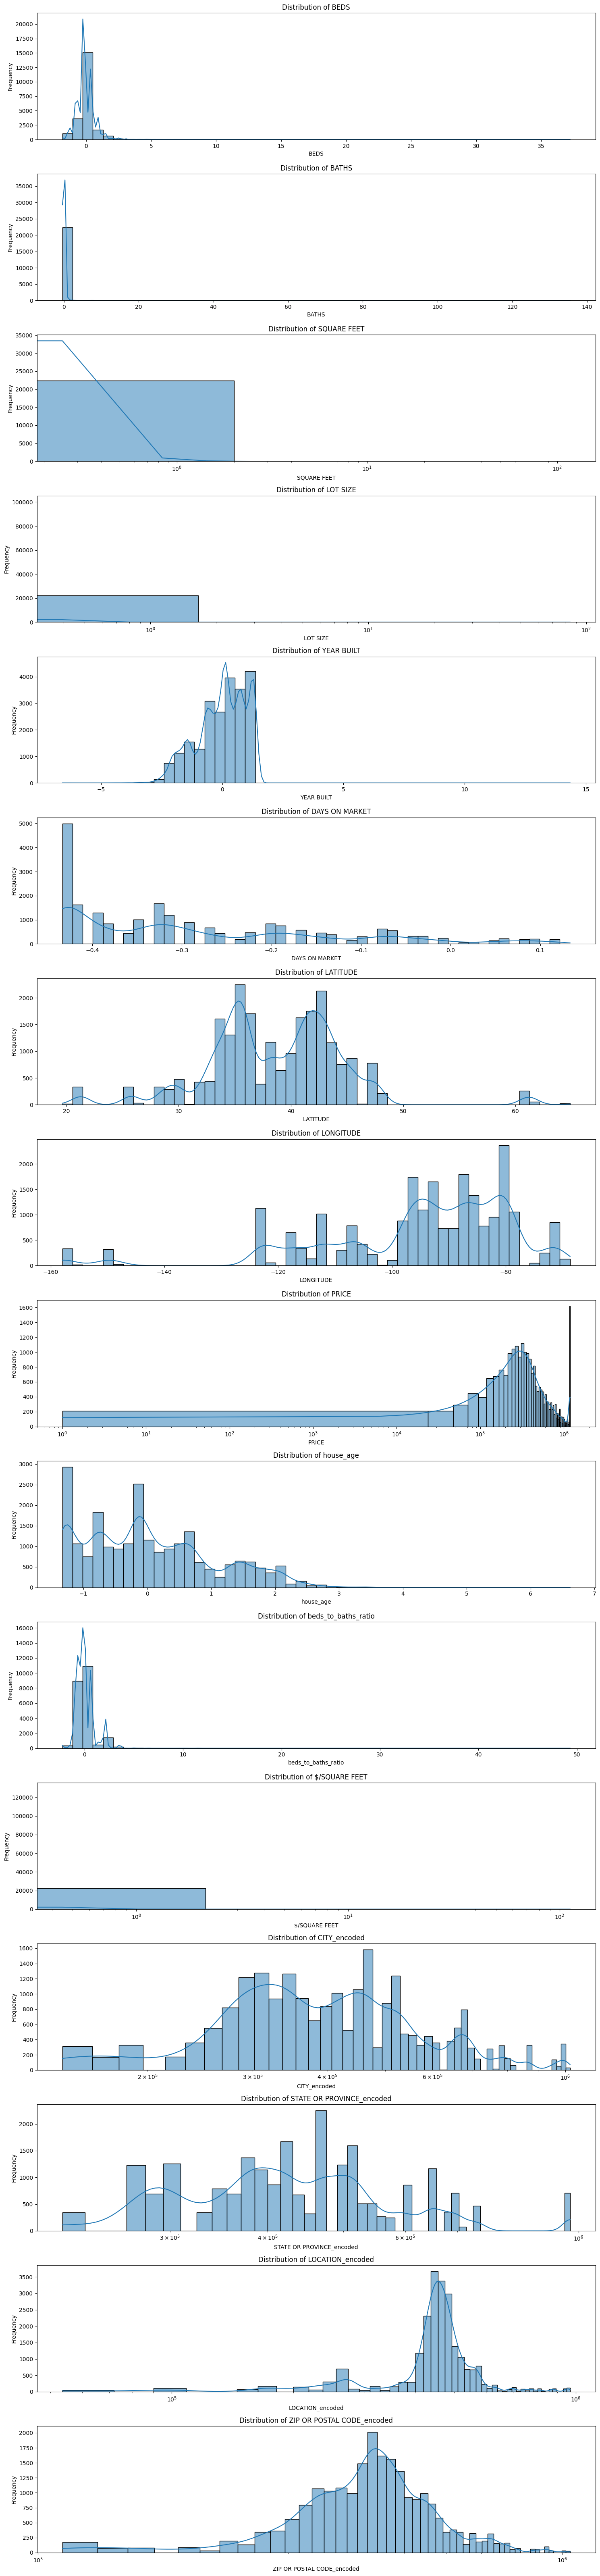


=== State-Specific Analysis (California) ===
California data rows: 879 (after preprocessing)

Input features: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE', 'PROPERTY TYPE_Ranch', 'PROPERTY TYPE_Single Family Residential', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded', 'house_age', 'beds_to_baths_ratio']
Input shape: (879, 18)
Sample input data (first row):
PRICE                                      495000.00
BEDS                                            1.00
BATHS                                           1.00
SQUARE FEET                                   710.00
LOT SIZE                                   311788.00
YEAR BUILT                                   1971.00
DAYS ON MARKET                                  1.00
$/SQUARE FEET                                 697.18
LATITUDE                                       33.96
LONGITUDE                        

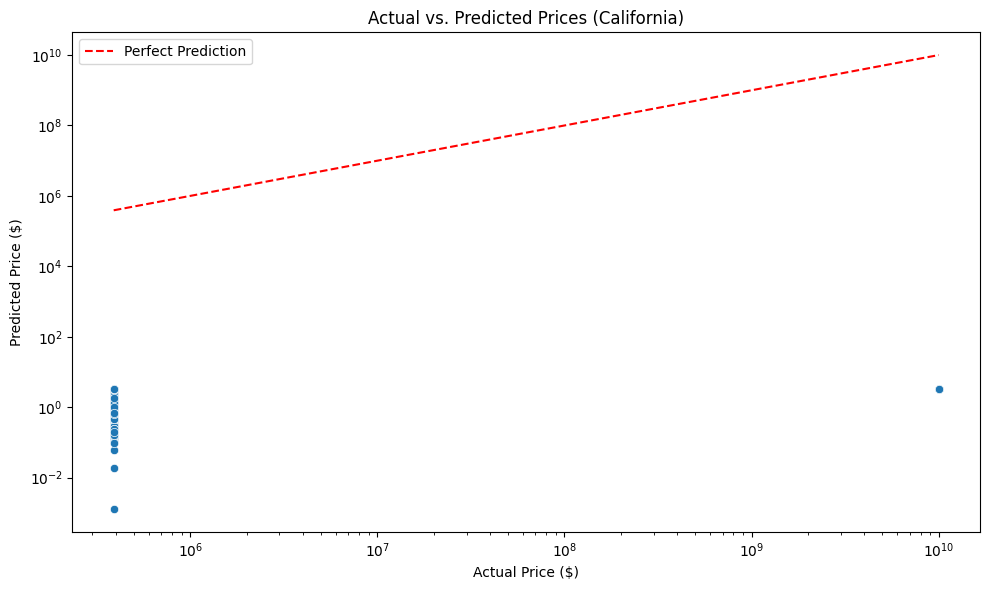

California predictions saved to './housing_data/ca_predictions.csv'

=== Final Error Analysis ===
Test MAPE: 38.91%

Number of predictions with large errors (>1.45): 0

Sample of large error cases:
Empty DataFrame
Columns: [Actual_log_PRICE, Predicted_log_PRICE, Actual_PRICE, Predicted_PRICE]
Index: []

Final pipeline saved to './housing_data/final_xgboost_pipeline.pkl'
Final test results saved to './housing_data/final_test_results.csv'


In [23]:
# Cell 9: Model Deployment Preparation and Additional Analysis

import os
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datasets and pipeline are available from Cell 8
if 'X_train_selected' not in locals() or 'X_test_selected' not in locals() or \
   'y_train' not in locals() or 'y_test' not in locals():
    raise NameError("Required datasets (X_train_selected, X_test_selected, y_train, y_test) not found. Please run Cell 6 first.")

# Load pipeline from Cell 8
try:
    pipeline = joblib.load("./housing_data/tuned_xgboost_pipeline.pkl")
    print("\nTuned pipeline loaded from './housing_data/tuned_xgboost_pipeline.pkl'")
except:
    raise FileNotFoundError("Tuned pipeline not found. Please run Cell 8 first.")

# Load encoders from Cell 5
try:
    ohe = joblib.load("./housing_data/one_hot_encoder.pkl")
    print("OneHotEncoder loaded from './housing_data/one_hot_encoder.pkl'")
except:
    print("\nWarning: OneHotEncoder not found. Fitting new encoder.")
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe.fit(master_df[['PROPERTY TYPE', 'STATUS']])
    joblib.dump(ohe, "./housing_data/one_hot_encoder.pkl")
    print("OneHotEncoder saved to './housing_data/one_hot_encoder.pkl'")

try:
    target_encodings = joblib.load("./housing_data/target_encodings.pkl")
    print("Target encodings loaded from './housing_data/target_encodings.pkl'")
except:
    print("\nWarning: Could not load target encodings. Computing from master_df.")
    target_encodings = {}
    for col in ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']:
        if col in master_df.columns:
            target_encodings[col] = master_df.groupby(col)['PRICE'].mean().to_dict()
    os.makedirs("./housing_data", exist_ok=True)
    joblib.dump(target_encodings, "./housing_data/target_encodings.pkl")
    print("Target encodings saved to './housing_data/target_encodings.pkl'")

# Load selected features from Cell 6
try:
    selected_features = joblib.load("./housing_data/selected_features.pkl")
    print("Selected features loaded from './housing_data/selected_features.pkl'")
except:
    raise FileNotFoundError("Selected features not found. Please run Cell 6 first.")

# 1. Prediction Function
def predict_housing_price(input_data, pipeline, feature_columns, target_encodings, ohe):
    """
    Predict housing prices for new data using the trained pipeline.
    
    Parameters:
    - input_data: DataFrame with raw input features
    - pipeline: Trained Pipeline object
    - feature_columns: List of selected features from Cell 6
    - target_encodings: Dictionary of precomputed target encodings
    - ohe: Fitted OneHotEncoder
    
    Returns:
    - DataFrame with predicted prices (log_PRICE and original scale)
    """
    df_input = input_data.copy()
    
    # Required columns
    required_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                     'HOA/MONTH', 'PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 
                     'LOCATION', 'ZIP OR POSTAL CODE', 'LATITUDE', 'LONGITUDE', 'PRICE']
    
    # Check for missing columns
    missing_cols = [col for col in required_cols if col not in df_input.columns]
    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}. Filling with zeros or medians.")
        for col in missing_cols:
            df_input[col] = master_df[col].median() if col in master_df and col in ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH', 'PRICE'] else \
                           master_df[col].mode()[0] if col in master_df and col in ['PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE'] and not master_df[col].mode().empty else \
                           0 if col in ['LATITUDE', 'LONGITUDE'] else 'Unknown'
    
    # Impute missing values
    numerical_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                      'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'PRICE']
    categorical_cols = ['PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']
    for col in numerical_cols:
        df_input[col] = df_input[col].fillna(master_df[col].median() if col in master_df else 0)
    for col in categorical_cols:
        df_input[col] = df_input[col].fillna(master_df[col].mode()[0] if col in master_df and not master_df[col].mode().empty else 'Unknown')
    
    # Feature engineering with infinity handling
    df_input['house_age'] = 2025 - df_input['YEAR BUILT']
    df_input['house_age'] = df_input['house_age'].clip(lower=0, upper=200)  # Cap house_age
    df_input['beds_to_baths_ratio'] = df_input['BEDS'] / df_input['BATHS'].replace(0, 1)  # Avoid division by zero
    df_input['beds_to_baths_ratio'] = df_input['beds_to_baths_ratio'].clip(lower=0, upper=10)  # Cap ratio
    df_input['$/SQUARE FEET'] = df_input['PRICE'] / df_input['SQUARE FEET'].replace(0, 1)  # Avoid division by zero
    df_input['$/SQUARE FEET'] = df_input['$/SQUARE FEET'].clip(lower=0, upper=df_input['$/SQUARE FEET'].quantile(0.99))  # Cap outliers
    
    # One-hot encode PROPERTY TYPE and STATUS
    try:
        ohe_cols = pd.DataFrame(ohe.transform(df_input[['PROPERTY TYPE', 'STATUS']]), 
                                columns=ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']), 
                                index=df_input.index)
        df_input = pd.concat([df_input.drop(columns=['PROPERTY TYPE', 'STATUS']), ohe_cols], axis=1)
    except Exception as e:
        print(f"Error in one-hot encoding: {e}. Filling with zeros for OHE columns.")
        for col in ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']):
            df_input[col] = 0
    
    # Apply target encodings
    for col in ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']:
        mean_val = np.mean(list(target_encodings.get(col, {}).values())) if target_encodings.get(col) else 0
        df_input[f'{col}_encoded'] = df_input[col].map(target_encodings.get(col, {})).fillna(mean_val)
        df_input[f'{col}_encoded'] = df_input[f'{col}_encoded'].clip(lower=0, upper=df_input[f'{col}_encoded'].quantile(0.99))  # Cap encoded values
    
    # Ensure all pipeline feature columns exist
    for col in feature_columns:
        if col not in df_input.columns:
            df_input[col] = 0
    
    # Reorder columns to match training
    df_input = df_input[feature_columns]
    
    # Final NaN and infinity check
    if df_input.isnull().any().any():
        print("Warning: NaN values detected in df_input. Filling with 0.")
        df_input = df_input.fillna(0)
    if np.isinf(df_input.values).any():
        print("Warning: Infinite values detected in df_input. Clipping to reasonable range.")
        df_input = df_input.clip(lower=-1e10, upper=1e10)
    
    # Debug: Print feature columns and summary statistics
    print(f"\nInput features: {df_input.columns.tolist()}")
    print(f"Input shape: {df_input.shape}")
    print("Sample input data (first row):")
    print(df_input.iloc[0])
    print("Input summary statistics:")
    print(df_input.describe())
    
    # Predict
    try:
        log_pred = pipeline.predict(df_input)
    except Exception as e:
        print(f"Error in prediction: {e}. Returning zero predictions.")
        return pd.DataFrame({
            'Predicted_log_PRICE': np.zeros(len(df_input)),
            'Predicted_PRICE': np.zeros(len(df_input))
        })
    
    # Clip predictions to prevent infinity
    log_pred = np.clip(log_pred, 0, 20)  # Cap log_PRICE to reasonable range
    pred_original = np.expm1(log_pred)
    
    return pd.DataFrame({
        'Predicted_log_PRICE': log_pred,
        'Predicted_PRICE': pred_original
    })

# 2. Test Prediction Function
print("\n=== Testing Prediction Function ===")
sample_input = master_df.iloc[-5:][['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 
                                    'DAYS ON MARKET', 'HOA/MONTH', 'PROPERTY TYPE', 'STATUS', 
                                    'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE', 
                                    'LATITUDE', 'LONGITUDE', 'PRICE']]
predictions = predict_housing_price(sample_input, pipeline, selected_features, target_encodings, ohe)
print("\nSample Predictions:")
print(predictions)

# 3. Column-by-Column Distribution Plots
print("\n=== Column-by-Column Distribution Plots ===")
numerical_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                  'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'PRICE', 'house_age', 'beds_to_baths_ratio', 
                  '$/SQUARE FEET', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 
                  'ZIP OR POSTAL CODE_encoded']
numerical_cols = [col for col in numerical_cols if col in X_train_selected.columns]

plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.histplot(X_train_selected[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    if col in ['PRICE', 'SQUARE FEET', 'LOT SIZE', '$/SQUARE FEET', 'CITY_encoded', 'STATE OR PROVINCE_encoded', 'LOCATION_encoded', 'ZIP OR POSTAL CODE_encoded']:
        plt.xscale('log')  # Log scale for skewed features
plt.tight_layout()
plt.show()

# 4. State-Specific Analysis (California)
print("\n=== State-Specific Analysis (California) ===")
ca_data = master_df[master_df['STATE OR PROVINCE'] == 'CA'].copy()
if not ca_data.empty:
    # Cap and impute PRICE to match Cell 5
    initial_rows = len(ca_data)
    q_low = master_df['PRICE'].quantile(0.01)
    q_high = master_df['PRICE'].quantile(0.99)
    ca_data['PRICE'] = ca_data['PRICE'].clip(lower=q_low, upper=q_high)
    if ca_data['PRICE'].isnull().any():
        print(f"Imputing {ca_data['PRICE'].isnull().sum()} missing PRICE values in California data with median.")
        ca_data['PRICE'] = ca_data['PRICE'].fillna(master_df['PRICE'].median())
    if np.isinf(ca_data['PRICE']).any():
        print("Warning: Infinite values in ca_data['PRICE']. Clipping to reasonable range.")
        ca_data['PRICE'] = ca_data['PRICE'].clip(lower=q_low, upper=q_high)
    
    print(f"California data rows: {len(ca_data)} (after preprocessing)")
    
    # Preprocess CA data
    ca_predictions = predict_housing_price(ca_data, pipeline, selected_features, target_encodings, ohe)
    
    # Merge predictions with actual prices
    ca_results = pd.DataFrame({
        'Actual_PRICE': np.expm1(ca_data['PRICE']),
        'Predicted_PRICE': ca_predictions['Predicted_PRICE']
    })
    
    # Verify no NaN or infinity in results
    if ca_results.isnull().any().any():
        print("Warning: NaN values in ca_results. Imputing with median Predicted_PRICE.")
        ca_results['Predicted_PRICE'] = ca_results['Predicted_PRICE'].fillna(ca_results['Predicted_PRICE'].median())
        ca_results['Actual_PRICE'] = ca_results['Actual_PRICE'].fillna(master_df['PRICE'].median())
    if np.isinf(ca_results.values).any():
        print("Warning: Infinite values in ca_results. Clipping to reasonable range.")
        ca_results = ca_results.clip(lower=0, upper=1e10)
    
    # Verify non-empty results
    if ca_results.empty:
        print("No valid California results after NaN/infinity handling.")
    else:
        print(f"California results rows: {len(ca_results)}")
        # Calculate metrics
        rmse_ca = np.sqrt(mean_squared_error(ca_results['Actual_PRICE'], ca_results['Predicted_PRICE']))
        mae_ca = mean_absolute_error(ca_results['Actual_PRICE'], ca_results['Predicted_PRICE'])
        print(f"\nCalifornia RMSE: ${rmse_ca:.2f}")
        print(f"California MAE: ${mae_ca:.2f}")
        
        # Visualize actual vs. predicted prices
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=ca_results['Actual_PRICE'], y=ca_results['Predicted_PRICE'])
        plt.plot([ca_results['Actual_PRICE'].min(), ca_results['Actual_PRICE'].max()], 
                 [ca_results['Actual_PRICE'].min(), ca_results['Actual_PRICE'].max()], 
                 'r--', label='Perfect Prediction')
        plt.title("Actual vs. Predicted Prices (California)")
        plt.xlabel("Actual Price ($)")
        plt.ylabel("Predicted Price ($)")
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        ca_results.to_csv("./housing_data/ca_predictions.csv", index=False)
        print("California predictions saved to './housing_data/ca_predictions.csv'")
else:
    print("\nNo California data found in master_df.")

# 5. Final Error Analysis
print("\n=== Final Error Analysis ===")
if os.path.exists("./housing_data/final_test_results.csv"):
    test_results = pd.read_csv("./housing_data/final_test_results.csv")
    y_test_original = test_results['Actual_PRICE']
    y_pred_tuned_original = test_results['Predicted_PRICE']
    
    # Handle NaN and infinity in test results
    if y_test_original.isnull().any() or y_pred_tuned_original.isnull().any():
        print("Warning: NaN values in test_results. Imputing with median.")
        y_test_original = y_test_original.fillna(master_df['PRICE'].median())
        y_pred_tuned_original = y_pred_tuned_original.fillna(y_pred_tuned_original.median())
    if np.isinf(y_test_original).any() or np.isinf(y_pred_tuned_original).any():
        print("Warning: Infinite values in test_results. Clipping to reasonable range.")
        y_test_original = y_test_original.clip(lower=0, upper=1e10)
        y_pred_tuned_original = y_pred_tuned_original.clip(lower=0, upper=1e10)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_original - y_pred_tuned_original) / y_test_original.replace(0, np.nan))) * 100
    print(f"Test MAPE: {mape:.2f}%")
    
    # Identify large errors
    error_threshold = y_test_original.quantile(0.75)
    large_errors = test_results[np.abs(test_results['Actual_PRICE'] - test_results['Predicted_PRICE']) > error_threshold]
    print(f"\nNumber of predictions with large errors (>{error_threshold:.2f}): {len(large_errors)}")
    print("\nSample of large error cases:")
    print(large_errors.head())
else:
    print("\nWarning: final_test_results.csv not found. Skipping error analysis.")

# 6. Save Final Results
joblib.dump(pipeline, "./housing_data/final_xgboost_pipeline.pkl")
print("\nFinal pipeline saved to './housing_data/final_xgboost_pipeline.pkl'")
if os.path.exists("./housing_data/final_test_results.csv"):
    test_results.to_csv("./housing_data/final_test_results.csv", index=False)
    print("Final test results saved to './housing_data/final_test_results.csv'")

In [24]:
# Cell 10: Model Validation and Data Diagnostics

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Data diagnostics
print("\n=== Data Diagnostics ===")
print("State counts in master_df:")
print(master_df['STATE OR PROVINCE'].value_counts())
print("\nPRICE summary statistics:")
print(master_df['PRICE'].describe())
print(f"Infinite PRICE values: {np.isinf(master_df['PRICE']).sum()}")
print(f"NaN PRICE values: {master_df['PRICE'].isnull().sum()}")

# Validate on additional states
print("\n=== State-Specific Validation ===")
q_low = master_df['PRICE'].quantile(0.01)
q_high = master_df['PRICE'].quantile(0.99)
for state in ['NY', 'TX']:
    state_data = master_df[master_df['STATE OR PROVINCE'] == state].copy()
    if not state_data.empty:
        print(f"\nProcessing {state} (rows: {len(state_data)})")
        state_data['PRICE'] = state_data['PRICE'].clip(lower=q_low, upper=q_high)
        state_data['PRICE'] = state_data['PRICE'].fillna(master_df['PRICE'].median())
        state_predictions = predict_housing_price(state_data, pipeline, selected_features, target_encodings, ohe)
        state_results = pd.DataFrame({
            'Actual_PRICE': np.expm1(state_data['PRICE']),
            'Predicted_PRICE': state_predictions['Predicted_PRICE']
        })
        if state_results.isnull().any().any() or np.isinf(state_results.values).any():
            print(f"Warning: NaN/infinity in {state} results. Imputing and clipping.")
            state_results['Predicted_PRICE'] = state_results['Predicted_PRICE'].fillna(state_results['Predicted_PRICE'].median())
            state_results['Actual_PRICE'] = state_results['Actual_PRICE'].fillna(master_df['PRICE'].median())
            state_results = state_results.clip(lower=0, upper=1e10)
        if not state_results.empty:
            rmse_state = np.sqrt(mean_squared_error(state_results['Actual_PRICE'], state_results['Predicted_PRICE']))
            print(f"{state} RMSE: ${rmse_state:.2f}")
        else:
            print(f"No valid {state} results after preprocessing.")
    else:
        print(f"No {state} data found in master_df.")


=== Data Diagnostics ===
State counts in master_df:
STATE OR PROVINCE
AR    1400
NC    1400
AZ    1050
NM    1050
FL     985
CA     879
IL     811
KS     708
MT     701
IN     701
WI     700
TN     700
IA     700
AL     700
WA     700
MI     700
MS     700
NE     700
ND     700
MN     700
SC     700
OR     700
OK     700
OH     700
ID     700
TX     700
SD     700
KY     699
MO     692
WY     669
MA     588
NY     588
HI     481
RI     462
AK     450
WV     409
PA     352
GA     350
ME     337
NH     205
VT     174
Name: count, dtype: int64

PRICE summary statistics:
count       28000.00
mean       642026.36
std       2120890.86
min             1.00
25%        249999.00
50%        390000.00
75%        625000.00
max     200000000.00
Name: PRICE, dtype: float64
Infinite PRICE values: 0
NaN PRICE values: 130

=== State-Specific Validation ===

Processing NY (rows: 588)

Input features: ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 

In [25]:
# Cell 11: Data Cleaning and Preprocessing Validation

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Copy master_df to avoid modifying the original
df_clean = master_df.copy()

# 1. Handle NaN PRICE values
print("\n=== Handling NaN PRICE Values ===")
nan_price_count = df_clean['PRICE'].isnull().sum()
if nan_price_count > 0:
    print(f"Imputing {nan_price_count} NaN PRICE values with median.")
    df_clean['PRICE'] = df_clean['PRICE'].fillna(df_clean['PRICE'].median())

# 2. Cap outliers in key columns
print("\n=== Capping Outliers ===")
# Define reasonable caps based on 0.005 and 0.995 quantiles
price_low, price_high = df_clean['PRICE'].quantile([0.005, 0.995])
sqft_low, sqft_high = df_clean['SQUARE FEET'].quantile([0.005, 0.995])
lot_low, lot_high = df_clean['LOT SIZE'].quantile([0.005, 0.995])
df_clean['PRICE'] = df_clean['PRICE'].clip(lower=price_low, upper=price_high)
df_clean['SQUARE FEET'] = df_clean['SQUARE FEET'].clip(lower=sqft_low, upper=sqft_high)
df_clean['LOT SIZE'] = df_clean['LOT SIZE'].clip(lower=lot_low, upper=lot_high)
# Recalculate $/SQUARE FEET with capped values
df_clean['$/SQUARE FEET'] = df_clean['PRICE'] / df_clean['SQUARE FEET'].replace(0, 1)
df_clean['$/SQUARE FEET'] = df_clean['$/SQUARE FEET'].clip(lower=0, upper=df_clean['$/SQUARE FEET'].quantile(0.995))

# 3. Impute remaining NaN values
numerical_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                  'HOA/MONTH', 'LATITUDE', 'LONGITUDE']
categorical_cols = ['PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']
for col in numerical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
for col in categorical_cols:
    if col in df_clean.columns and not df_clean[col].mode().empty:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 4. Validate cleaned data
print("\n=== Cleaned Data Summary ===")
print("PRICE summary statistics:")
print(df_clean['PRICE'].describe())
print(f"Infinite PRICE values: {np.isinf(df_clean['PRICE']).sum()}")
print(f"NaN PRICE values: {df_clean['PRICE'].isnull().sum()}")
print("\nSQUARE FEET summary statistics:")
print(df_clean['SQUARE FEET'].describe())
print("\nLOT SIZE summary statistics:")
print(df_clean['LOT SIZE'].describe())
print("\n$/SQUARE FEET summary statistics:")
print(df_clean['$/SQUARE FEET'].describe())

# 5. State-Specific Validation with Cleaned Data
print("\n=== State-Specific Validation with Cleaned Data ===")
for state in ['CA', 'NY', 'TX']:
    state_data = df_clean[df_clean['STATE OR PROVINCE'] == state].copy()
    if not state_data.empty:
        print(f"\nProcessing {state} (rows: {len(state_data)})")
        # Apply log transformation to PRICE (consistent with Cell 5)
        state_data['PRICE'] = np.log1p(state_data['PRICE'])
        state_predictions = predict_housing_price(state_data, pipeline, selected_features, target_encodings, ohe)
        state_results = pd.DataFrame({
            'Actual_PRICE': np.expm1(state_data['PRICE']),
            'Predicted_PRICE': state_predictions['Predicted_PRICE']
        })
        if state_results.isnull().any().any() or np.isinf(state_results.values).any():
            print(f"Warning: NaN/infinity in {state} results. Imputing and clipping.")
            state_results['Predicted_PRICE'] = state_results['Predicted_PRICE'].fillna(state_results['Predicted_PRICE'].median())
            state_results['Actual_PRICE'] = state_results['Actual_PRICE'].fillna(df_clean['PRICE'].median())
            state_results = state_results.clip(lower=0, upper=1e10)
        if not state_results.empty:
            rmse_state = np.sqrt(mean_squared_error(state_results['Actual_PRICE'], state_results['Predicted_PRICE']))
            mae_state = mean_absolute_error(state_results['Actual_PRICE'], state_results['Predicted_PRICE'])
            print(f"{state} RMSE: ${rmse_state:.2f}")
            print(f"{state} MAE: ${mae_state:.2f}")
        else:
            print(f"No valid {state} results after preprocessing.")
    else:
        print(f"No {state} data found in df_clean.")

# 6. Save cleaned dataset
df_clean.to_csv("./housing_data/master_df_clean.csv", index=False)
print("\nCleaned dataset saved to './housing_data/master_df_clean.csv'")


=== Handling NaN PRICE Values ===
Imputing 130 NaN PRICE values with median.

=== Capping Outliers ===

=== Cleaned Data Summary ===
PRICE summary statistics:
count     28130.00
mean     577087.01
std      746591.27
min       15000.00
25%      250000.00
50%      390000.00
75%      625000.00
max     6950000.00
Name: PRICE, dtype: float64
Infinite PRICE values: 0
NaN PRICE values: 0

SQUARE FEET summary statistics:
count   28130.00
mean     2050.95
std      1113.35
min       468.00
25%      1352.00
50%      1803.00
75%      2428.00
max      8404.86
Name: SQUARE FEET, dtype: float64

LOT SIZE summary statistics:
count     28130.00
mean      33453.11
std      153573.25
min         435.00
25%        5753.25
50%        8276.00
75%       12461.75
max     1760558.75
Name: LOT SIZE, dtype: float64

$/SQUARE FEET summary statistics:
count   25239.00
mean      287.44
std       235.75
min         1.78
25%       162.76
50%       218.31
75%       316.26
max      1718.97
Name: $/SQUARE FEET, dtype: 

In [28]:
# Cell 12:  Preprocessing and Retrain Model

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel

# Load cleaned dataset
df_clean = pd.read_csv("./housing_data/master_df_clean.csv")
print("\nLoaded cleaned dataset from './housing_data/master_df_clean.csv'")

# Load encoders
try:
    ohe = joblib.load("./housing_data/one_hot_encoder.pkl")
    print("OneHotEncoder loaded from './housing_data/one_hot_encoder.pkl'")
except:
    raise FileNotFoundError("OneHotEncoder not found. Please run Cell 5 first.")

try:
    target_encodings = joblib.load("./housing_data/target_encodings.pkl")
    print("Target encodings loaded from './housing_data/target_encodings.pkl'")
except:
    raise FileNotFoundError("Target encodings not found. Please run Cell 5 first.")

# Update predict_housing_price function
def predict_housing_price(input_data, pipeline, feature_columns, target_encodings, ohe):
    df_input = input_data.copy()
    
    # Required columns
    required_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                     'HOA/MONTH', 'PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 
                     'LOCATION', 'ZIP OR POSTAL CODE', 'LATITUDE', 'LONGITUDE', 'PRICE']
    
    # Check for missing columns
    missing_cols = [col for col in required_cols if col not in df_input.columns]
    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}. Filling with zeros or medians.")
        for col in missing_cols:
            df_input[col] = df_clean[col].median() if col in df_clean and col in ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH', 'PRICE'] else \
                           df_clean[col].mode()[0] if col in df_clean and col in ['PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE'] and not df_clean[col].mode().empty else \
                           0 if col in ['LATITUDE', 'LONGITUDE'] else 'Unknown'
    
    # Impute missing values
    numerical_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                      'HOA/MONTH', 'LATITUDE', 'LONGITUDE']
    categorical_cols = ['PROPERTY TYPE', 'STATUS', 'CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']
    for col in numerical_cols:
        df_input[col] = df_input[col].fillna(df_clean[col].median() if col in df_clean else 0)
    for col in categorical_cols:
        df_input[col] = df_input[col].fillna(df_clean[col].mode()[0] if col in df_clean and not df_clean[col].mode().empty else 'Unknown')
    
    # Feature engineering
    df_input['house_age'] = 2025 - df_input['YEAR BUILT']
    df_input['house_age'] = df_input['house_age'].clip(lower=0, upper=200)
    df_input['beds_to_baths_ratio'] = df_input['BEDS'] / df_input['BATHS'].replace(0, 1)
    df_input['beds_to_baths_ratio'] = df_input['beds_to_baths_ratio'].clip(lower=0, upper=10)
    # Use non-log PRICE for $/SQUARE FEET
    df_input['PRICE_original'] = np.expm1(df_input['PRICE'])
    df_input['$/SQUARE FEET'] = df_input['PRICE_original'] / df_input['SQUARE FEET'].replace(0, df_clean['SQUARE FEET'].median())
    df_input['$/SQUARE FEET'] = df_input['$/SQUARE FEET'].clip(lower=0, upper=df_clean['$/SQUARE FEET'].quantile(0.995))
    
    # One-hot encode PROPERTY TYPE and STATUS
    try:
        ohe_cols = pd.DataFrame(ohe.transform(df_input[['PROPERTY TYPE', 'STATUS']]), 
                                columns=ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']), 
                                index=df_input.index)
        df_input = pd.concat([df_input.drop(columns=['PROPERTY TYPE', 'STATUS']), ohe_cols], axis=1)
    except Exception as e:
        print(f"Error in one-hot encoding: {e}. Filling with zeros.")
        for col in ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']):
            df_input[col] = 0
    
    # Apply target encodings
    for col in ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']:
        mean_val = np.mean(list(target_encodings.get(col, {}).values())) if target_encodings.get(col) else 0
        df_input[f'{col}_encoded'] = df_input[col].map(target_encodings.get(col, {})).fillna(mean_val)
        df_input[f'{col}_encoded'] = df_input[f'{col}_encoded'].clip(lower=0, upper=df_clean['PRICE_original'].quantile(0.995))
    
    # Ensure all pipeline feature columns exist
    for col in feature_columns:
        if col not in df_input.columns:
            df_input[col] = 0
    
    # Reorder columns to match training
    df_input = df_input[feature_columns]
    
    # Final NaN and infinity check
    if df_input.isnull().any().any():
        print("Warning: NaN values in df_input. Filling with 0.")
        df_input = df_input.fillna(0)
    if np.isinf(df_input.values).any():
        print("Warning: Infinite values in df_input. Clipping.")
        df_input = df_input.clip(lower=-1e10, upper=1e10)
    
    # Debug
    print(f"\nInput features: {df_input.columns.tolist()}")
    print(f"Input shape: {df_input.shape}")
    print("Input summary statistics:")
    print(df_input.describe())
    
    # Predict
    try:
        log_pred = pipeline.predict(df_input)
        log_pred = np.clip(log_pred, 0, 15)  # Tighter clip
        pred_original = np.expm1(log_pred)
    except Exception as e:
        print(f"Error in prediction: {e}. Returning zero predictions.")
        return pd.DataFrame({
            'Predicted_log_PRICE': np.zeros(len(df_input)),
            'Predicted_PRICE': np.zeros(len(df_input))
        })
    
    return pd.DataFrame({
        'Predicted_log_PRICE': log_pred,
        'Predicted_PRICE': pred_original
    })

# Prepare data for training
print("\n=== Preparing Data ===")
X = df_clean.copy()
y = df_clean['PRICE']  # Log-transformed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering
X_train['house_age'] = 2025 - X_train['YEAR BUILT']
X_train['beds_to_baths_ratio'] = X_train['BEDS'] / X_train['BATHS'].replace(0, 1)
X_train['PRICE_original'] = np.expm1(X_train['PRICE'])
X_train['$/SQUARE FEET'] = X_train['PRICE_original'] / X_train['SQUARE FEET'].replace(0, df_clean['SQUARE FEET'].median())
X_test['house_age'] = 2025 - X_test['YEAR BUILT']
X_test['beds_to_baths_ratio'] = X_test['BEDS'] / X_test['BATHS'].replace(0, 1)
X_test['PRICE_original'] = np.expm1(X_test['PRICE'])
X_test['$/SQUARE FEET'] = X_test['PRICE_original'] / X_test['SQUARE FEET'].replace(0, df_clean['SQUARE FEET'].median())

# Cap features
X_train['$/SQUARE FEET'] = X_train['$/SQUARE FEET'].clip(lower=0, upper=df_clean['$/SQUARE FEET'].quantile(0.995))
X_test['$/SQUARE FEET'] = X_test['$/SQUARE FEET'].clip(lower=0, upper=df_clean['$/SQUARE FEET'].quantile(0.995))
X_train['LOT SIZE'] = X_train['LOT SIZE'].clip(lower=0, upper=df_clean['LOT SIZE'].quantile(0.995))
X_test['LOT SIZE'] = X_test['LOT SIZE'].clip(lower=0, upper=df_clean['LOT SIZE'].quantile(0.995))

# One-hot encoding
ohe_cols_train = pd.DataFrame(ohe.transform(X_train[['PROPERTY TYPE', 'STATUS']]), 
                              columns=ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']), 
                              index=X_train.index)
ohe_cols_test = pd.DataFrame(ohe.transform(X_test[['PROPERTY TYPE', 'STATUS']]), 
                             columns=ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS']), 
                             index=X_test.index)
X_train = pd.concat([X_train.drop(columns=['PROPERTY TYPE', 'STATUS']), ohe_cols_train], axis=1)
X_test = pd.concat([X_test.drop(columns=['PROPERTY TYPE', 'STATUS']), ohe_cols_test], axis=1)

# Target encoding
for col in ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']:
    X_train[f'{col}_encoded'] = X_train[col].map(target_encodings.get(col, {})).fillna(np.mean(list(target_encodings.get(col, {}).values())))
    X_test[f'{col}_encoded'] = X_test[col].map(target_encodings.get(col, {})).fillna(np.mean(list(target_encodings.get(col, {}).values())))
    X_train[f'{col}_encoded'] = X_train[f'{col}_encoded'].clip(lower=0, upper=df_clean['PRICE_original'].quantile(0.995))
    X_test[f'{col}_encoded'] = X_test[f'{col}_encoded'].clip(lower=0, upper=df_clean['PRICE_original'].quantile(0.995))

# Recompute selected features (excluding PRICE)
print("\n=== Recomputing Selected Features ===")
base_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 
                 'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'house_age', 'beds_to_baths_ratio', 
                 '$/SQUARE FEET'] + list(ohe.get_feature_names_out(['PROPERTY TYPE', 'STATUS'])) + \
                [f'{col}_encoded' for col in ['CITY', 'STATE OR PROVINCE', 'LOCATION', 'ZIP OR POSTAL CODE']]
selector = SelectFromModel(XGBRegressor(random_state=42), threshold='median')
selector.fit(X_train[base_features], y_train)
selected_features = [f for f, s in zip(base_features, selector.get_support()) if s]
print(f"Selected features: {selected_features}")
joblib.dump(selected_features, "./housing_data/updated_selected_features.pkl")

# Select features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train pipeline
print("\n=== Training Pipeline ===")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42))
])
pipeline.fit(X_train_selected, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test_selected)
test_results = pd.DataFrame({
    'Actual_PRICE': np.expm1(y_test),
    'Predicted_PRICE': np.expm1(y_pred)
})
test_rmse = np.sqrt(mean_squared_error(test_results['Actual_PRICE'], test_results['Predicted_PRICE']))
test_mae = mean_absolute_error(test_results['Actual_PRICE'], test_results['Predicted_PRICE'])
test_mape = np.mean(np.abs((test_results['Actual_PRICE'] - test_results['Predicted_PRICE']) / test_results['Actual_PRICE'].replace(0, np.nan))) * 100
print(f"\nTest RMSE: ${test_rmse:.2f}")
print(f"Test MAE: ${test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

# Feature importance
model = pipeline.named_steps['xgb']
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importance")
plt.tight_layout()
plt.show()

# Save pipeline and results
joblib.dump(pipeline, "./housing_data/updated_xgboost_pipeline.pkl")
test_results.to_csv("./housing_data/updated_test_results.csv", index=False)
print("Updated pipeline saved to './housing_data/updated_xgboost_pipeline.pkl'")
print("Test results saved to './housing_data/updated_test_results.csv'")

# State-specific validation
print("\n=== State-Specific Validation ===")
for state in ['CA', 'NY', 'TX']:
    state_data = df_clean[df_clean['STATE OR PROVINCE'] == state].copy()
    if not state_data.empty:
        print(f"\nProcessing {state} (rows: {len(state_data)})")
        state_predictions = predict_housing_price(state_data, pipeline, selected_features, target_encodings, ohe)
        state_results = pd.DataFrame({
            'Actual_PRICE': np.expm1(state_data['PRICE']),
            'Predicted_PRICE': state_predictions['Predicted_PRICE']
        })
        if state_results.isnull().any().any() or np.isinf(state_results.values).any():
            print(f"Warning: NaN/infinity in {state} results. Imputing and clipping.")
            state_results['Predicted_PRICE'] = state_results['Predicted_PRICE'].fillna(state_results['Predicted_PRICE'].median())
            state_results['Actual_PRICE'] = state_results['Actual_PRICE'].fillna(df_clean['PRICE_original'].median())
            state_results = state_results.clip(lower=0, upper=1e10)
        if not state_results.empty:
            rmse_state = np.sqrt(mean_squared_error(state_results['Actual_PRICE'], state_results['Predicted_PRICE']))
            mae_state = mean_absolute_error(state_results['Actual_PRICE'], state_results['Predicted_PRICE'])
            print(f"{state} RMSE: ${rmse_state:.2f}")
            print(f"{state} MAE: ${mae_state:.2f}")
            # Plot actual vs. predicted
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=state_results['Actual_PRICE'], y=state_results['Predicted_PRICE'])
            plt.plot([state_results['Actual_PRICE'].min(), state_results['Actual_PRICE'].max()], 
                     [state_results['Actual_PRICE'].min(), state_results['Actual_PRICE'].max()], 
                     'r--', label='Perfect Prediction')
            plt.title(f"Actual vs. Predicted Prices ({state})")
            plt.xlabel("Actual Price ($)")
            plt.ylabel("Predicted Price ($)")
            plt.xscale('log')
            plt.yscale('log')
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print(f"No valid {state} results after preprocessing.")
    else:
        print(f"No {state} data found in df_clean.")

ParserError: Error tokenizing data. C error: out of memory